## TITANIC SURVIVAL PREDICTION

importing required libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

LOADING DATASET

In [87]:
df = pd.read_csv('/content/drive/MyDrive/tested.csv')

SHAPE OF DATAFRAME

In [89]:
df.shape

(418, 12)

first 5 rows of dataframe

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


LAST 5 rows of dataframe

In [93]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


DATA TYPES

In [91]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [97]:
df = df.drop(columns='Fare', axis=1)

In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Cabin          327
Embarked         0
dtype: int64

In [99]:
df = df.drop(columns='Cabin', axis=1)

In [100]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [101]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [102]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000


In [104]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S


In [105]:
df.shape

(418, 7)

In [106]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

DATA VISUALIZATION

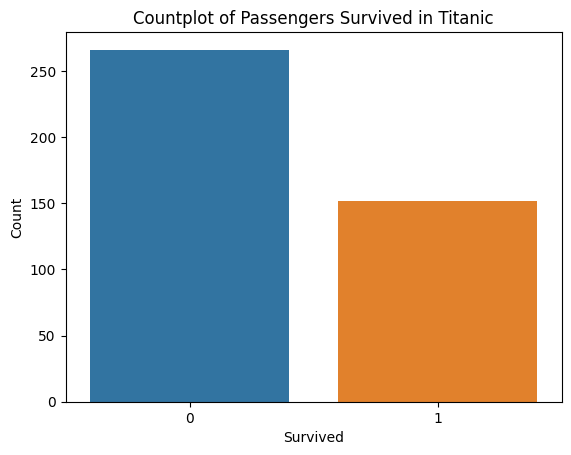

In [110]:

# Use seaborn's countplot to create the plot
sns.countplot(x="Survived", data=df)

plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Countplot of Passengers Survived in Titanic")

# Show the plot
plt.show()

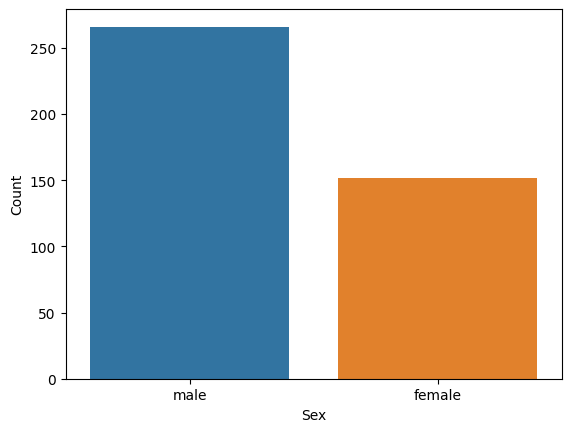

In [111]:
# Use seaborn's countplot to create the plot
sns.countplot(x="Sex", data=df)

# Add labels and a title
plt.xlabel("Sex")
plt.ylabel("Count")

# Show the plot
plt.show()

NUMBER OF SURVIVORS GENDERWISE

In [112]:
survivors_by_gender =df.groupby('Sex')['Survived'].sum()
print(survivors_by_gender)

Sex
female    152
male        0
Name: Survived, dtype: int64


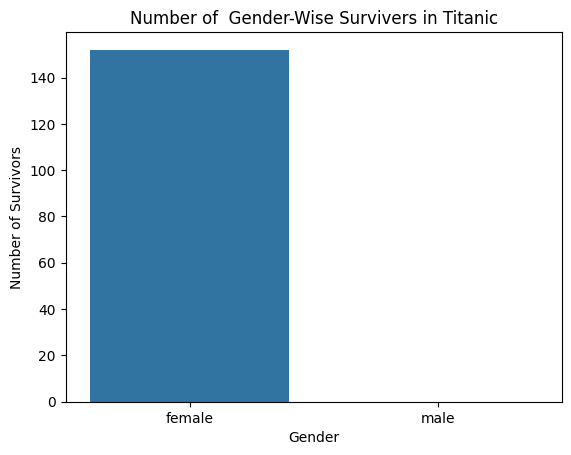

In [113]:
survivors_by_gender =df.groupby('Sex')['Survived'].sum().reset_index()
# Use Seaborn's barplot to create the visualization
sns.barplot(x='Sex', y='Survived', data=survivors_by_gender)
# Add labels and a title
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.title("Number of  Gender-Wise Survivers in Titanic")

# Show the plot
plt.show()

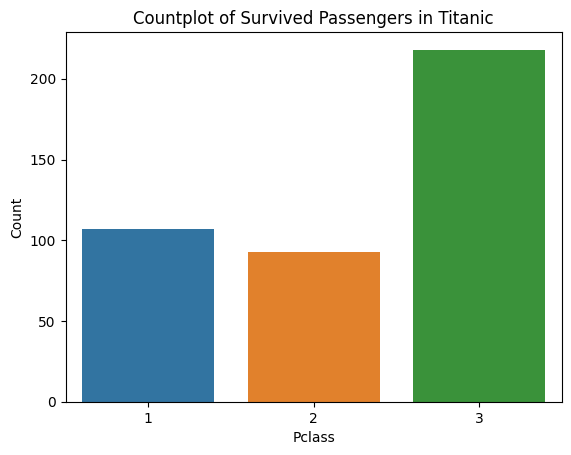

In [116]:
sns.countplot(x="Pclass", data=df)

# Add labels and a title
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Countplot of Survived Passengers in Titanic")

# Show the plot
plt.show()

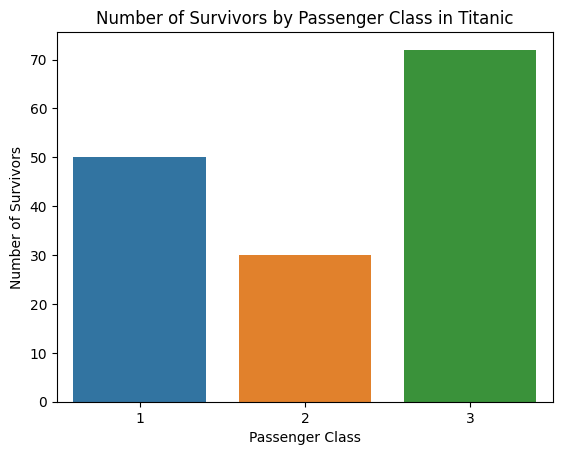

In [118]:
survivors_by_pclass = df.groupby('Pclass')['Survived'].sum().reset_index()
sns.barplot(x='Pclass', y='Survived', data=survivors_by_pclass)
plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.title("Number of Survivors by Passenger Class in Titanic")
plt.show()

ENCODING CATEGORICAL COLUMN

In [119]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [120]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [121]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [122]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.5,0,0,2
1,1,3,1,47.0,1,0,0
2,0,2,0,62.0,0,0,2
3,0,3,0,27.0,0,0,0
4,1,3,1,22.0,1,1,0


SEPARATING FEATURES AND TARGET

In [123]:
x = df.drop(columns='Survived', axis=1)
y = df['Survived']
print(x)

     Pclass  Sex       Age  SibSp  Parch  Embarked
0         3    0  34.50000      0      0         2
1         3    1  47.00000      1      0         0
2         2    0  62.00000      0      0         2
3         3    0  27.00000      0      0         0
4         3    1  22.00000      1      1         0
..      ...  ...       ...    ...    ...       ...
413       3    0  30.27259      0      0         0
414       1    1  39.00000      0      0         1
415       3    0  38.50000      0      0         0
416       3    0  30.27259      0      0         0
417       3    0  30.27259      1      1         1

[418 rows x 6 columns]


In [124]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


SPLITTING DATA INTO TRAINING DATA AND TEST DATA

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

In [126]:
print(x.shape, x_train.shape, x_test.shape)

(418, 6) (292, 6) (126, 6)


## KNN K NEARSET NEIGHBOURS

In [127]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [128]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [129]:
y_pred = model.predict(x_test)
print("Accuracy score :",accuracy_score(y_test, y_pred))

Accuracy score : 0.8095238095238095


In [133]:
x_train_prediction = model.predict(x_train)

In [134]:
print(x_train_prediction)

[0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1]


In [135]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [136]:
print("Accuracy score of training data: ",training_data_accuracy)

Accuracy score of training data:  1.0


In [137]:
x_test_prediction = model.predict(x_test)

In [138]:
print(x_test_prediction)

[0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0]


In [139]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [140]:
print("Accuracy score of test data: ",test_data_accuracy)


Accuracy score of test data:  1.0


In [141]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[76,  9],
       [15, 26]])

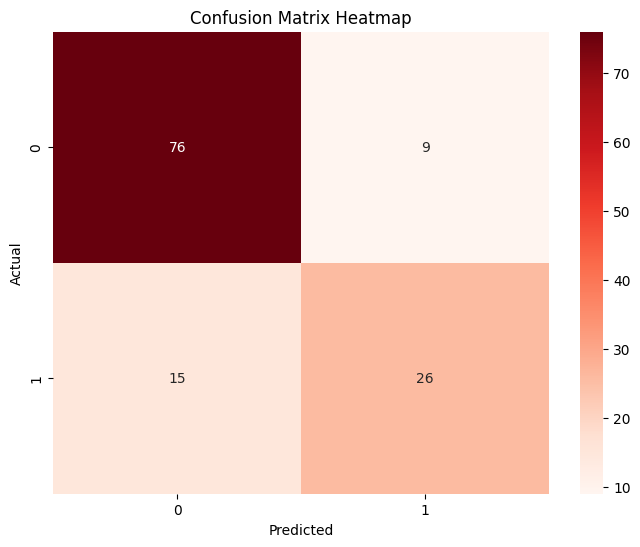

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## LOGISTIC REGRESSION

In [131]:
model = LogisticRegression()

In [132]:
model.fit(x_train, y_train)

LogisticRegression()

In [147]:
y_pred = model.predict(x_test)
print("Accuracy score :",accuracy_score(y_test, y_pred))

Accuracy score : 1.0


In [148]:
print("Precision score :", precision_score(y_test, y_pred))

Precision score : 1.0


In [149]:
print("Recall score :", recall_score(y_test, y_pred))

Recall score : 1.0


In [150]:
print("F1 score :", f1_score(y_test, y_pred))

F1 score : 1.0


In [151]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[85,  0],
       [ 0, 41]])

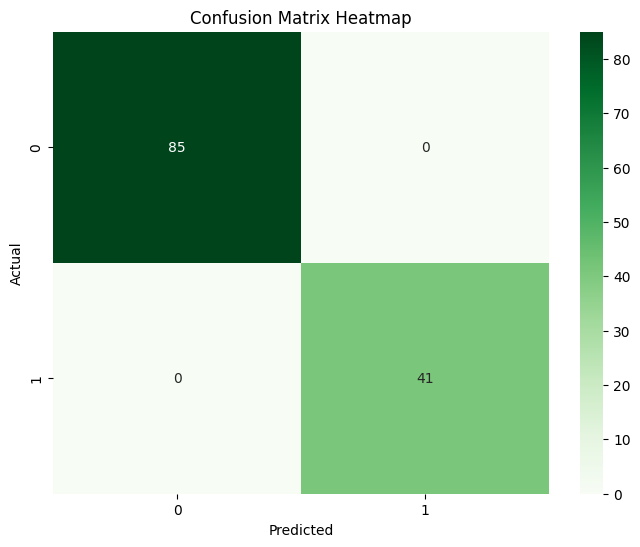

In [152]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()